In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [7]:
X, y = make_moons(100, noise=0.25,random_state=2)

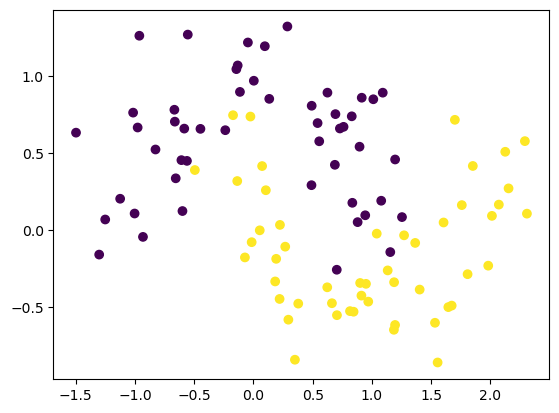

In [8]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [19]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [20]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.get_weights()

[array([[-2.0585984e-01,  1.4803052e+00, -1.3632995e+00,  1.5449636e-02,
         -1.2656066e-01, -6.3487118e-01, -6.0255873e-01, -1.0064331e+00,
          1.8423227e+00, -1.2618517e+00],
        [ 3.4396732e-01,  1.6220995e+00,  1.6614286e+00, -5.9179183e-02,
          9.2497026e-04, -5.1820385e-01,  1.6105942e-01, -9.0802264e-01,
          4.8811468e-01, -1.0403805e+00]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.35544926, -0.12996396, -0.66443735, -0.7692966 , -0.31048357,
         -0.16410296,  0.2968748 , -0.25892732, -0.7340589 ,  0.6365328 ],
        [-0.50293314,  0.1291339 ,  0.12983187,  0.5512992 , -0.22687553,
          0.5790219 ,  0.26700145, -0.08234931, -0.3821803 ,  0.44390038],
        [-0.0690928 , -0.8199693 , -0.11303674,  0.2699646 ,  0.05825955,
         -0.40531623,  0.8718947 , -0.05642076,  0.7361456 ,  0.20460357],
        [ 0.47152796,  0.30448163, -0.02866274, -0.45547822, -0.54709446,
          0.3838355 ,

In [12]:
initial_weights = model.get_weights()

In [13]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [14]:
model.set_weights(initial_weights)

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.5070 - loss: 0.9465 - val_accuracy: 0.3500 - val_loss: 1.2116
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5305 - loss: 0.8743 - val_accuracy: 0.3500 - val_loss: 1.1526
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5203 - loss: 0.8438 - val_accuracy: 0.3500 - val_loss: 1.0981
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5219 - loss: 0.8116 - val_accuracy: 0.3500 - val_loss: 1.0461
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4711 - loss: 0.8033 - val_accuracy: 0.3500 - val_loss: 0.9954
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4906 - loss: 0.7616 - val_accuracy: 0.3500 - val_loss: 0.9509
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5250 - loss: 0.7050 - val_accuracy: 0.3500 - val_loss: 0.9131
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5492 - loss: 0.6947 - val_accuracy: 0.3500 - val_loss

Epoch 52/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8273 - loss: 0.3856 - val_accuracy: 0.9000 - val_loss: 0.2866
Epoch 53/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8820 - loss: 0.3570 - val_accuracy: 0.9000 - val_loss: 0.2853
Epoch 54/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8195 - loss: 0.3906 - val_accuracy: 0.9000 - val_loss: 0.2850
Epoch 55/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8703 - loss: 0.3541 - val_accuracy: 0.9000 - val_loss: 0.2853
Epoch 56/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8625 - loss: 0.3499 - val_accuracy: 0.9000 - val_loss: 0.2847
Epoch 57/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8508 - loss: 0.3551 - val_accuracy: 0.9000 - val_loss: 0.2824
Epoch 58/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8781 - loss: 0.3382 - val_accuracy: 0.9000 - val_loss: 0.2780
Epoch 59/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8391 - loss: 0.3706 - val_accuracy: 0.9000 - v

In [23]:
model.get_weights()

[array([[ 1.5817084 , -0.41718295, -0.63922924, -1.1973003 , -1.8605827 ,
          0.688699  ,  0.466903  , -1.2295736 ,  0.8650687 ,  0.7677316 ],
        [-0.9202488 , -0.37888578,  0.36230662, -0.4235973 , -0.7668579 ,
          0.07882743,  0.83805877, -0.11044814, -0.02037636,  1.048354  ]],
       dtype=float32),
 array([-0.07247481, -0.05750585, -0.11153278,  0.22059034, -0.08185223,
        -0.03802542,  0.0680286 ,  0.04658241,  0.1016114 ,  0.08738538],
       dtype=float32),
 array([[-0.9056858 , -0.3152036 , -0.46657225, -0.44728705, -0.6044754 ,
         -0.06157294, -0.34686303,  0.5083023 , -0.6800327 ,  0.17517547],
        [-0.480892  , -0.08036293, -0.23352529, -0.32120952,  0.7291315 ,
          0.7332512 , -0.19206616, -0.19637303,  0.87257177, -0.7003203 ],
        [-0.42979744,  0.53845894,  0.03945695,  0.7897173 ,  0.68901384,
          0.21670523,  0.49971572, -0.08742595,  0.19058503, -0.11882537],
        [-0.28354773, -0.656665  ,  0.6077898 , -0.49613684, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step


<Axes: >

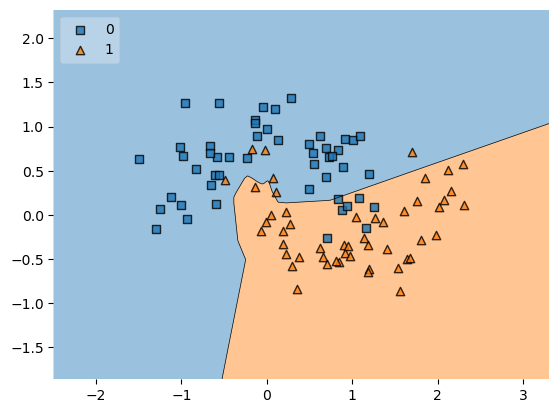

In [24]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)